<a href="https://colab.research.google.com/github/saurabh1deshpande/machine-learning/blob/master/K_Nearest_Neighbor_Example_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()

X = pd.DataFrame(iris.data).reset_index()
X.columns = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target = pd.Series(iris.target)
names = iris.target_names
X['Species'] = target
X['Species'] = X['Species'].replace({v: k for v, k in enumerate(names)})

In [34]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [36]:
X.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


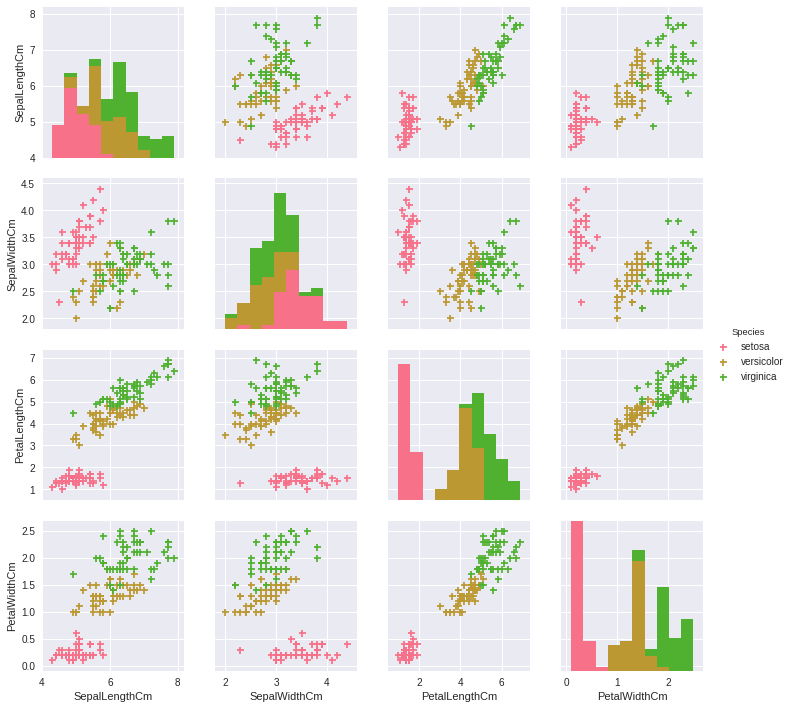

In [37]:
tmp = X.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [0]:
X = X.drop(['Id', 'Species'], axis=1)
y = target



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([            
            ('clf', KNeighborsClassifier())
        ])

param_grid = {'clf__n_neighbors':[5,6,7,8,9,10]}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=10,verbose=2,n_jobs=-1)
grid.fit(X_train, y_train)
print(f'Best training accuracy: {grid.best_score_:.3f}')
print(f'Best params: {grid.best_params_}')
print(f'Score:\t{grid.score(X_test, y_test)}')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    0.2s remaining:    0.2s


Best training accuracy: 0.992
Best params: {'clf__n_neighbors': 9}
Score:	0.9666666666666667


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
